# Naive Bayes

```python
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
```

Naïve Bayes adalah algoritma `classification` yang didasarkan pada prinsip **probabilitas** dan **Teorema Bayes**, menyatakan bahwa peluang suatu hipotesis dapat dihitung dari peluang data, asalkan setiap fitur dianggap ***independent***. Algoritma ini menghitung **probabilitas** _a priori_ dari setiap kelas dan mengalikannya dengan **probabilitas** kondisi setiap fitur muncul dalam data, menghasilkan **probabilitas** _posterior_. Meskipun asumsi independensi antar fitur sering kali tidak sepenuhnya realistis di dunia nyata, Naïve Bayes tetap efektif dan efisien, terutama untuk masalah dengan data berukuran besar dan dimensi tinggi seperti pengolahan bahasa alami, deteksi spam, dan diagnosis medis. Pendekatan ini juga mencakup varian-varian seperti **Gaussian Naïve** Bayes untuk data kontinu, serta _Multinomial_ dan _Bernoulli_ Naïve Bayes untuk data teks dan biner, di mana teknik seperti `Laplace smoothing` digunakan untuk mengatasi masalah **probabilitas** nol. Secara keseluruhan, Naïve Bayes menawarkan metode sederhana namun kuat untuk `classification`, memanfaatkan teori **probabilitas** untuk memberikan prediksi yang cepat dan andal dalam berbagai aplikasi data mining.

## Teorema Bayes

Teorema Bayes adalah dasar matematis dari algoritma Naïve Bayes, yang memungkinkan perhitungan probabilitas bersyarat untuk klasifikasi data. Teorema ini menghubungkan probabilitas hipotesis dengan bukti yang diamati melalui formula berikut:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

**Penjelasan Komponen:**
- **$ P(A|B) $**: Probabilitas posterior, yaitu peluang hipotesis $ A $ benar jika bukti $ B $ teramati.
- **$ P(B|A) $**: Likelihood, yaitu peluang bukti $ B $ muncul jika hipotesis $ A $ benar.
- **$ P(A) $**: Probabilitas prior, yaitu peluang awal hipotesis $ A $ sebelum bukti diamati.
- **$ P(B) $**: Probabilitas bukti, yaitu peluang keseluruhan bukti $ B $ terjadi, yang berfungsi sebagai normalisasi.

Dalam konteks Naïve Bayes untuk klasifikasi, kita ingin menghitung probabilitas suatu kelas $ C $ diberikan fitur $ X_1, X_2, \dots, X_n $:

$$
P(C|X_1, X_2, \dots, X_n) = \frac{P(X_1, X_2, \dots, X_n|C) \cdot P(C)}{P(X_1, X_2, \dots, X_n)}
$$

**Asumsi Independensi Fitur:**
Naïve Bayes menyederhanakan perhitungan dengan mengasumsikan bahwa fitur-fitur $ X_1, X_2, \dots, X_n $ saling independen jika kelas $ C $ diketahui. Dengan asumsi ini, probabilitas gabungan fitur menjadi:

$$
P(X_1, X_2, \dots, X_n|C) = \prod_{i=1}^n P(X_i|C)
$$

Sehingga rumus Naïve Bayes menjadi:

$$
P(C|X_1, X_2, \dots, X_n) \propto P(C) \cdot \prod_{i=1}^n P(X_i|C)
$$

Karena $ P(X_1, X_2, \dots, X_n) $ konstan untuk semua kelas, kita hanya perlu memaksimalkan pembilang untuk memilih kelas dengan probabilitas tertinggi:

$$
y = \arg\max_C \left( P(C) \cdot \prod_{i=1}^n P(X_i|C) \right)
$$

**Proses Pelatihan:**
1. **Menghitung Prior $ P(C) $**: Diperoleh dari frekuensi relatif kelas dalam data pelatihan:
   $$
   P(C) = \frac{\text{Jumlah sampel kelas } C}{\text{Total sampel}}
   $$
2. **Menghitung Likelihood $ P(X_i|C) $**: Tergantung pada jenis Naïve Bayes (Gaussian, Multinomial, atau Bernoulli), dihitung berdasarkan distribusi fitur dalam kelas.
3. **Laplace Smoothing**: Untuk menghindari probabilitas nol, ditambahkan parameter $ \alpha $:
   $$
   P(X_i|C) = \frac{\text{Frekuensi } X_i \text{ di kelas } C + \alpha}{\text{Total fitur di kelas } C + \alpha \cdot n}
   $$

**Ilustrasi Sederhana:**
Misalkan kita ingin mengklasifikasikan apakah seseorang akan bermain tenis berdasarkan cuaca (cerah, hujan) dan suhu (panas, sejuk). Dengan data pelatihan, kita hitung:
- Prior: $ P(\text{Bermain}) $, $ P(\text{Tidak Bermain}) $.
- Likelihood: $ P(\text{Cerah}|\text{Bermain}) $, $ P(\text{Panas}|\text{Bermain}) $, dll.
- Posterior: Mengalikan prior dan likelihood untuk memilih kelas dengan probabilitas tertinggi.

### Independence Assumption

Naive Bayes mengasumsikan semua fitur ($ x_1, x_2, ..., x_n $) independen terhadap satu lain jika kelas ($ y $) diketahui:

$$
P(x_1, x_2, ..., x_n | y) = P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y)
$$

Asumsi ini menyederhanakan perhitungan, tetapi bisa mengurangi akurasi jika fitur saling berkorelasi.

***Training***

1. Hitung prior probability untuk setiap kelas:

  $$
  P(y) = \frac{\text{Jumlah sampel kelas } y}{\text{Total sampel}}
  $$

2. Hitung likelihood setiap fitur berdasarkan kelas:
   - Untuk Gaussian: Hitung mean ($ \mu $) dan deviasi standar ($ \sigma $) fitur.
   - Untuk Multinomial/Bernoulli: Hitung probabilitas fitur $ x_i $ pada kelas $ y $:

    $$
    P(x_i|y) = \frac{\text{Frekuensi } x_i \text{ di kelas } y + \alpha}{\text{Total fitur di kelas } y + \alpha \cdot n}
    $$

   ($ \alpha $ = Laplace smoothing untuk menghindari probabilitas nol).

***Prediction***
Untuk sampel baru ($ x_1, x_2, ..., x_n $), pilih kelas $ y $ dengan nilai posterior tertinggi:

$$
y = \arg\max_{y} \left( P(y) \cdot \prod_{i=1}^n P(x_i|y) \right)
$$

### Advantages & Disadvantages


| Kelebihan                              | Disadvantages                                              |
|----------------------------------------|------------------------------------------------------------|
| Cepat dan efisien untuk dataset besar. | Asumsi independensi fitur sering tidak valid.              |
| Handal pada data dimensi tinggi.       | Sensitif terhadap data tidak seimbang (*class imbalance*). |
| Cocok untuk klasifikasi teks.          | Tidak bisa menangani fitur yang saling bergantung.         |

## Types of Naïve Bayes

### Gaussian Naïve Bayes (GNB)

```python
from sklearn.naive_bayes import GaussianNB
```

- **Kapan Digunakan**: Cocok untuk data dengan fitur **kontinu** yang diasumsikan mengikuti **distribusi normal** (Gaussian).
- **Rumus Probabilitas**:
  $$
  P(X_i|C) = \frac{1}{\sqrt{2\pi\sigma_C^2}} \exp\left(-\frac{(X_i - \mu_C)^2}{2\sigma_C^2}\right)
  $$
  - $ \mu_C $: Rata-rata fitur $ X_i $ dalam kelas $ C $.
  - $ \sigma_C^2 $: Varians fitur $ X_i $ dalam kelas $ C $.
- **Proses Pelatihan**:
  1. Hitung rata-rata ($ \mu_C $) dan varians ($ \sigma_C^2 $) untuk setiap fitur dalam setiap kelas.
  2. Gunakan rumus distribusi normal untuk menghitung likelihood setiap fitur.
- **Aplikasi**:
  - Klasifikasi data numerik, seperti pengukuran sensor (suhu, tekanan).
  - Analisis data medis, seperti tekanan darah atau kadar glukosa.
- **Contoh**:
  Dalam dataset Iris, fitur seperti panjang kelopak diasumsikan berdistribusi normal, sehingga GNB dapat digunakan untuk memprediksi spesies bunga.
- **Kelebihan**:
  - Efektif untuk data kontinu dengan distribusi mendekati normal.
  - Komputasi cepat untuk dataset besar.
- **Kekurangan**:
  - Performa menurun jika fitur tidak berdistribusi normal.
  - Sensitif terhadap outlier yang dapat memengaruhi rata-rata dan varians.


### Multinomial Naïve Bayes

```python
from sklearn.naive_bayes import MultinomialNB
```
- **Kapan Digunakan**: Cocok untuk data **kategorikal** atau **diskrit**, terutama dalam **klasifikasi teks** di mana fitur mewakili frekuensi kemunculan (misalnya, jumlah kata dalam dokumen).
- **Rumus Probabilitas**:
  $$
  P(X_i|C) = \frac{\text{Frekuensi } X_i \text{ di kelas } C + \alpha}{\text{Total frekuensi fitur di kelas } C + \alpha \cdot n}
  $$
  - $ \alpha $: Parameter Laplace smoothing untuk mencegah probabilitas nol.
  - $ n $: Jumlah fitur unik.
- **Proses Pelatihan**:
  1. Hitung frekuensi kemunculan setiap fitur (misalnya, kata) dalam setiap kelas.
  2. Normalisasi dengan total frekuensi fitur di kelas, ditambah smoothing.
- **Aplikasi**:
  - **Deteksi Spam**: Mengklasifikasikan email berdasarkan frekuensi kata seperti "gratis" atau "penawaran".
  - **Analisis Sentimen**: Menentukan sentimen positif/negatif dari ulasan berdasarkan kata-kata.
  - **Klasifikasi Dokumen**: Mengkategorikan artikel berita ke dalam topik seperti olahraga atau politik.
- **Contoh**:
  Dalam klasifikasi teks, dokumen direpresentasikan sebagai vektor frekuensi kata (bag-of-words). Multinomial Naïve Bayes menghitung probabilitas dokumen termasuk dalam kelas tertentu berdasarkan frekuensi kata.
- **Kelebihan**:
  - Sangat efektif untuk data teks dengan representasi frekuensi.
  - Robust terhadap dataset dengan banyak fitur (kata).
- **Kekurangan**:
  - Tidak cocok untuk data kontinu.
  - Mengabaikan urutan kata dalam teks, yang dapat memengaruhi makna.

### Bernoulli Naïve Bayes

```python
from sklearn.naive_bayes import BernoulliNB
```

- **Kapan Digunakan**: Digunakan untuk data **biner** (0/1), di mana fitur menunjukkan **kehadiran atau ketidakhadiran** suatu elemen (misalnya, apakah kata tertentu muncul dalam dokumen).
- **Rumus Probabilitas**:
  $$
  P(X_i|C) = P(X_i = 1|C)^{X_i} \cdot (1 - P(X_i = 1|C))^{1 - X_i}
  $$
  - $ X_i = 1 $: Fitur ada (misalnya, kata muncul).
  - $ X_i = 0 $: Fitur tidak ada (misalnya, kata tidak muncul).
- **Proses Pelatihan**:
  1. Hitung probabilitas kehadiran setiap fitur dalam setiap kelas.
  2. Gunakan distribusi Bernoulli untuk menghitung likelihood.
- **Aplikasi**:
  - **Klasifikasi Teks Biner**: Misalnya, mendeteksi email spam berdasarkan keberadaan kata tertentu.
  - **Pemrosesan Sinyal**: Mengklasifikasikan keberadaan fitur tertentu dalam data.
- **Contoh**:
  Dalam deteksi spam, dokumen direpresentasikan sebagai vektor biner (1 jika kata ada, 0 jika tidak ada). Bernoulli Naïve Bayes menghitung probabilitas kelas berdasarkan keberadaan kata-kata tertentu.
- **Kelebihan**:
  - Cocok untuk data biner atau boolean.
  - Komputasi sederhana untuk dataset dengan fitur biner.
- **Kekurangan**:
  - Tidak mempertimbangkan frekuensi kemunculan, hanya keberadaan fitur.
  - Kurang fleksibel untuk data non-biner.

### Complement Naïve Bayes (CNB)

```python
from sklearn.naive_bayes import ComplementNB
```

- **Deskripsi**: Varian dari Multinomial Naïve Bayes yang dirancang untuk menangani **data tidak seimbang** (class imbalance). CNB menghitung probabilitas berdasarkan komplemen kelas (yaitu, semua kelas lain selain kelas yang sedang dipertimbangkan), sehingga lebih robust terhadap kelas mayoritas yang mendominasi.
- **Kapan Digunakan**: Klasifikasi teks, terutama ketika distribusi kelas tidak seimbang, seperti pada analisis sentimen atau deteksi spam.
- **Kelebihan**: Mengurangi bias terhadap kelas mayoritas.
- **Implementasi**: Tersedia di `scikit-learn` sebagai `ComplementNB`.

### Categorical Naïve Bayes

```python
from sklearn.naive_bayes import CategoricalNB
```

- **Deskripsi**: Digunakan untuk data **kategorikal** di mana fitur tidak memiliki frekuensi (seperti Multinomial) tetapi hanya kategori diskrit tanpa urutan (misalnya, warna: merah, biru, hijau).
- **Kapan Digunakan**: Ketika fitur berupa variabel kategorikal tanpa asumsi distribusi tertentu.
- **Rumus Probabilitas**:
  \[
  P(X_i|C) = \frac{\text{Jumlah kemunculan kategori } X_i \text{ di kelas } C + \alpha}{\text{Total sampel di kelas } C + \alpha \cdot k}
  \]
  di mana \( k \) adalah jumlah kategori unik untuk fitur tersebut.
- **Implementasi**: Tersedia di `scikit-learn` sebagai `CategoricalNB` (sejak versi 0.24).
- **Contoh**: Klasifikasi berdasarkan atribut seperti jenis kelamin, status perkawinan, atau kategori produk.

## Get Cleaned Data

In [150]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
# Pastikan direktori untuk menyimpan file ada
output_dir = "data/tugas4/"
os.makedirs(output_dir, exist_ok=True)

In [152]:
data = pd.read_csv("data/tugas2/iris_KKN-cleaned.csv")
data = data.drop('id', axis=1)
print("5 Baris Pertama Data:")
display(data.head())

5 Baris Pertama Data:


,class,petal length,petal width,sepal length,sepal width
0,Iris-setosa,1.4,0.2,4.9,3.0
1,Iris-setosa,1.3,0.2,4.8,3.2
2,Iris-setosa,1.5,0.2,4.6,3.1
3,Iris-setosa,1.4,0.2,5.0,3.6
4,Iris-setosa,1.7,0.4,5.4,3.9


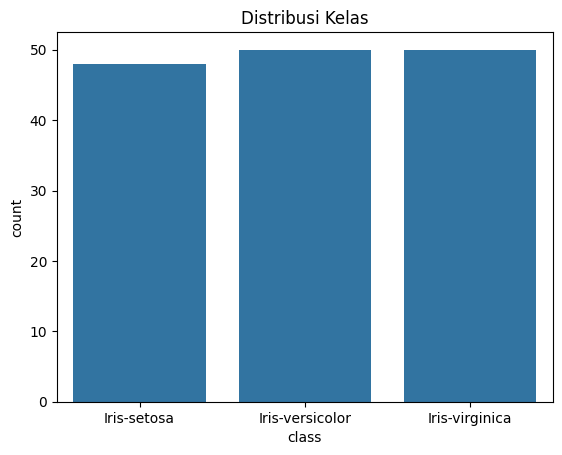

In [153]:
# Visualisasi Distribusi Kelas
sns.countplot(x='class', data=data)
plt.title("Distribusi Kelas")
plt.savefig(os.path.join(output_dir, "assets/LOF_distribusi_class.png"))
plt.show()

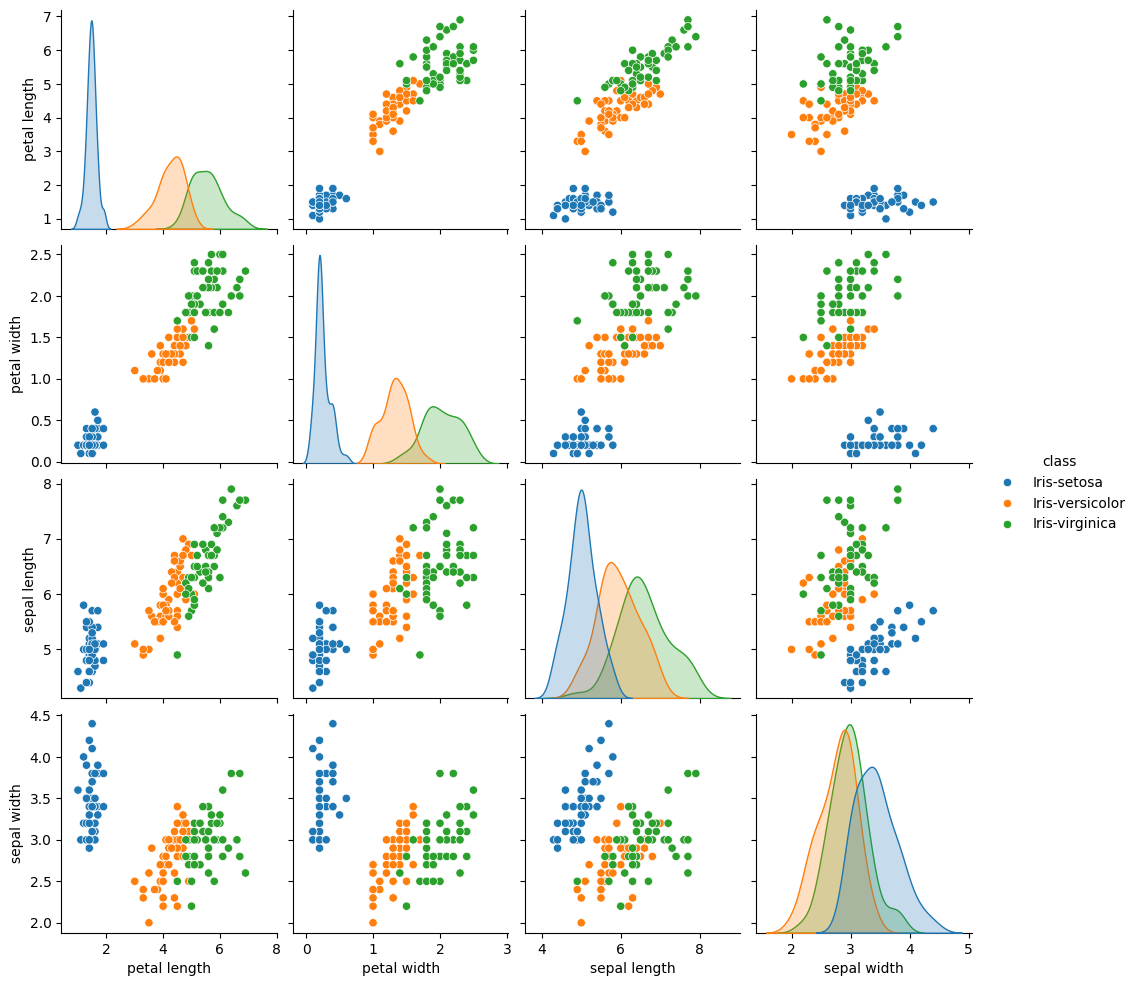

In [154]:
# Visualisasi Pairplot
sns.pairplot(data, hue='class')
plt.savefig(os.path.join(output_dir, "assets/LOF_pairplot.png"))
plt.show()

## Split Data

In [155]:
# Pisahkan fitur (X) dan target (y)
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Independence Assumption

$$
P(x_1, x_2, ..., x_n | y) = P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y)
$$

**Implementasi dalam Kode**:
- Asumsi ini "tertanam" dalam algoritma `GaussianNB()` di `scikit-learn`.
- Perkalian likelihood dilakukan otomatis saat prediksi:
  ```python
  posterior = prior * (likelihood_feature1 * likelihood_feature2 * ...)
  ```

In [156]:
model = GaussianNB()

### Predictions

$$
y = \arg\max_{y} \left( P(y) \cdot \prod_{i=1}^n P(x_i|y) \right)
$$

Implementasi dalam Kode:
- `model.predict()` melakukan perhitungan ini untuk setiap sampel di `X_test`.
- Hasil prediksi disimpan di `y_pred`.


### Teorema Bayes

$$
P(y|x) = \frac{P(x|y) \cdot P(y)}{P(x)}
$$

Implementasi dalam Kode:
- `model.fit(X_train, y_train)` menghitung $P(y)$ (**prior**) dan $P(x|y)$ (**likelihood**).
- `model.predict(X_test)` menghitung $P(y|x)$ (**posterior**) untuk setiap kelas dan memilih kelas dengan posterior tertinggi.
- **Evidence ($P(x)$)** tidak dihitung langsung karena pada klasifikasi, $P(x)$ konstan untuk semua kelas, cukup membandingkan pembilang ($P(x|y) \cdot P(y)$).

In [157]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Prior Probability ($P(y)$)

$$
P(y) = \frac{\text{Jumlah sampel kelas } y}{\text{Total sampel}}
$$

Implementasi dalam Kode:
- Prior probability dihitung saat `model.fit()` dan disimpan di `model.class_prior_`.

In [158]:
prior_df = pd.DataFrame({
    'Class': model.classes_,
    'Prior Probability': model.class_prior_
})
print("=== Prior Probability per Class ===")
display(prior_df)

prior_df.to_csv(os.path.join(output_dir, "prior_probability.csv"), index=False)

=== Prior Probability per Class ===


,Class,Prior Probability
0,Iris-setosa,0.313559
1,Iris-versicolor,0.338983
2,Iris-virginica,0.347458


### Likelihood ($P(x|y)$)

Rumus (Gaussian Naive Bayes):

$$
P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)
$$

Implementasi dalam Kode:
- Mean ($\mu_y$) dan Varians ($\sigma_y^2$) dihitung saat `model.fit()` dan disimpan di:
  - `model.theta_` (mean)
  - `model.var_` (variance)

In [159]:
feature_names = X.columns
class_names = model.classes_

In [160]:
mu_df = pd.DataFrame(model.theta_, columns=feature_names, index=class_names)
print("=== Mean (μ) per Class ===")
display(mu_df)

mu_df.to_csv(os.path.join(output_dir, "mean_per_class.csv"))

=== Mean (μ) per Class ===


,petal length,petal width,sepal length,sepal width
Iris-setosa,1.459459,0.251351,5.005405,3.451351
Iris-versicolor,4.292500,1.322500,6.010000,2.805000
Iris-virginica,5.626829,2.058537,6.636585,2.995122


In [161]:
var_df = pd.DataFrame(model.var_, columns=feature_names, index=class_names)
print("=== Variance (σ²) per Class ===")
display(var_df)

var_df.to_csv(os.path.join(output_dir, "variance_per_class.csv"))

=== Variance (σ²) per Class ===


,petal length,petal width,sepal length,sepal width
Iris-setosa,0.031600,0.010066,0.124836,0.123039
Iris-versicolor,0.176694,0.037744,0.256400,0.095475
Iris-virginica,0.275622,0.070720,0.379881,0.109245


## Confusion Matrix

In [162]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("=== Confusion Matrix ===")
display(cm_df)

cm_df.to_csv(os.path.join(output_dir, "confusion_matrix.csv"))

=== Confusion Matrix ===


,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,11,0,0
Iris-versicolor,0,10,0
Iris-virginica,0,2,7


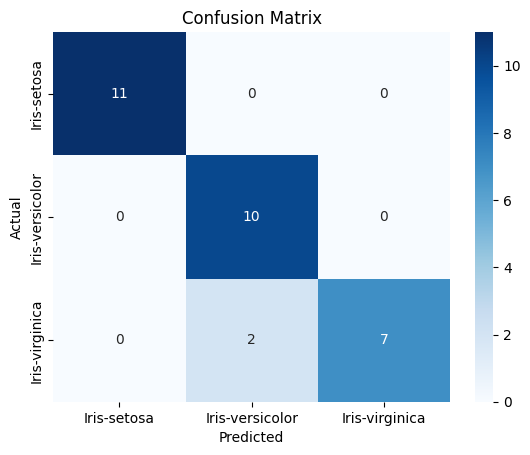

In [163]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(output_dir, "assets/LOF_confusion_matrix.png"))
plt.show()

In [164]:
print("=== Classification Report ===")
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
display(class_report_df)

class_report_df.to_csv(os.path.join(output_dir, "classification_report.csv"))

=== Classification Report ===


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,11.000000
Iris-versicolor,0.833333,1.000000,0.909091,10.000000
Iris-virginica,1.000000,0.777778,0.875000,9.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.944444,0.925926,0.928030,30.000000
weighted avg,0.944444,0.933333,0.932197,30.000000


In [165]:
with pd.ExcelWriter(os.path.join(output_dir, "naive_bayes_results.xlsx")) as writer:
    prior_df.to_excel(writer, sheet_name="Prior_Probability", index=False)
    mu_df.to_excel(writer, sheet_name="Mean_per_Class")
    var_df.to_excel(writer, sheet_name="Variance_per_Class")
    cm_df.to_excel(writer, sheet_name="Confusion_Matrix")
    class_report_df.to_excel(writer, sheet_name="Classification_Report")